## Imports / Load Data

In [147]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [140]:
from fbprophet import Prophet

In [141]:
from alibi_detect.od import OutlierProphet

In [142]:
df = pd.read_csv('../data/raw/data_2020_05.csv', parse_dates=['ts'])

In [143]:
df.head()

,in_room,rr,hr,ts,user_id
0,False,0.0,93.546196,2019-03-20 03:00:00,1
1,False,0.0,-1.000000,2019-03-20 03:01:00,1
2,False,0.0,-1.000000,2019-03-20 03:02:00,1
3,False,0.0,98.374496,2019-03-20 03:03:00,1
4,False,0.0,94.692595,2019-03-20 03:04:00,1


## Model

In [144]:
def plot_outliers(model: OutlierProphet, df: pd.DataFrame):
    """Plot outliers from Prophet."""
    preds = model.predict(df, return_instance_score=True, return_forecast=True)
    outl = preds['data']['forecast'][preds['data']['is_outlier'].is_outlier == 1]
    fig = model.model.plot(preds['data']['forecast'])
    ax = fig.gca()
    ax.scatter(outl['ds'], outl['y'], c='r')
    ax.set_title(F'User: {user}');    

In [ ]:
min_hr = 1  # Values below this ignored
min_rr = 3  # Values below this ignored

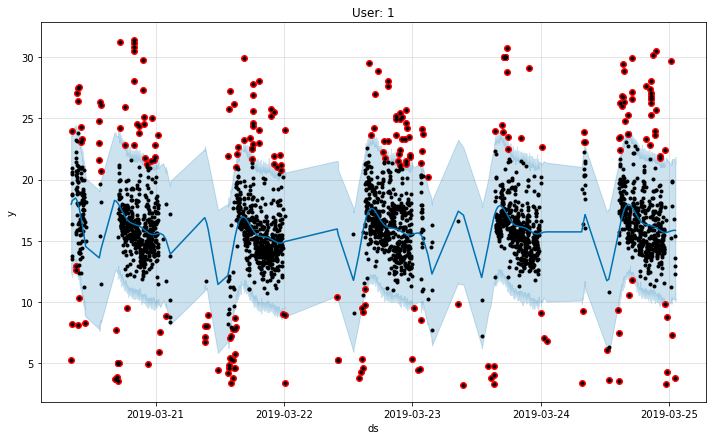

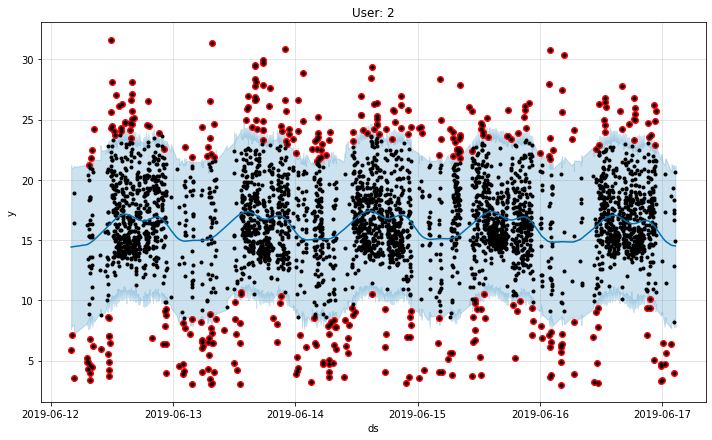

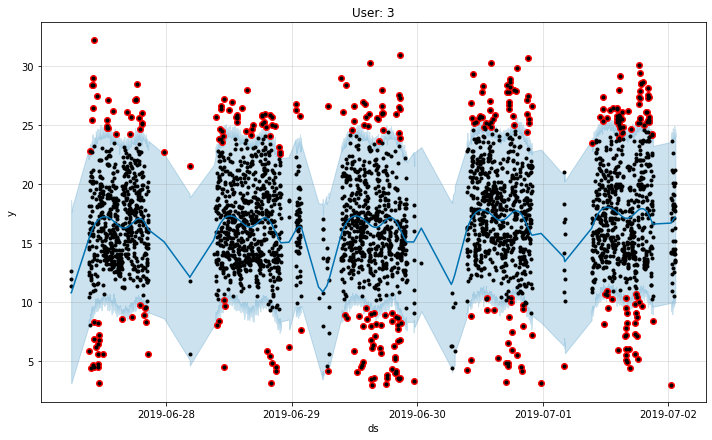

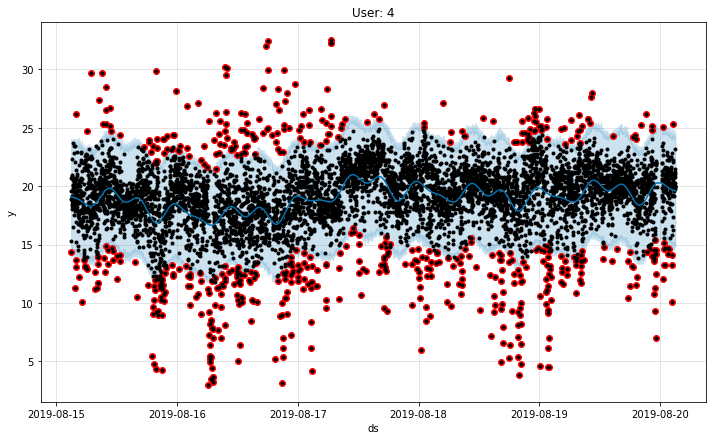

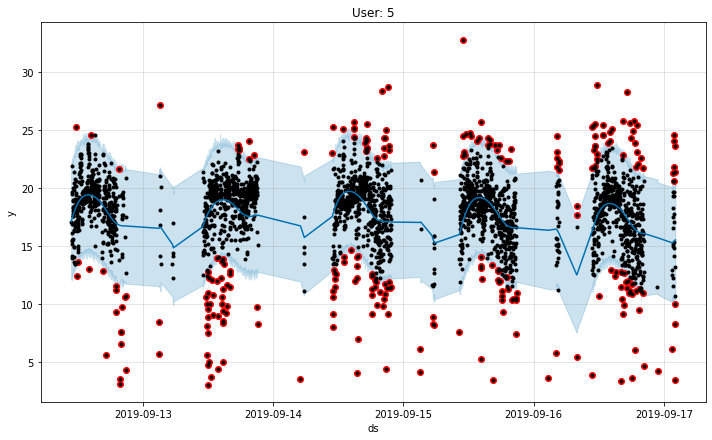

In [114]:
# Plot outlier models for respitory rate
for user in df.user_id.unique():
    X_rr = df[(df.in_room == True) & (df.user_id == user) & (df.rr > min_rr)][['rr', 'ts']]
    X_rr.columns = ['y', 'ds']
    pr_rr = OutlierProphet(threshold=0.9,
                        yearly_seasonality=False, weekly_seasonality=False)
    pr_rr.fit(X_rr)
    plot_outliers(pr_rr, X_rr)

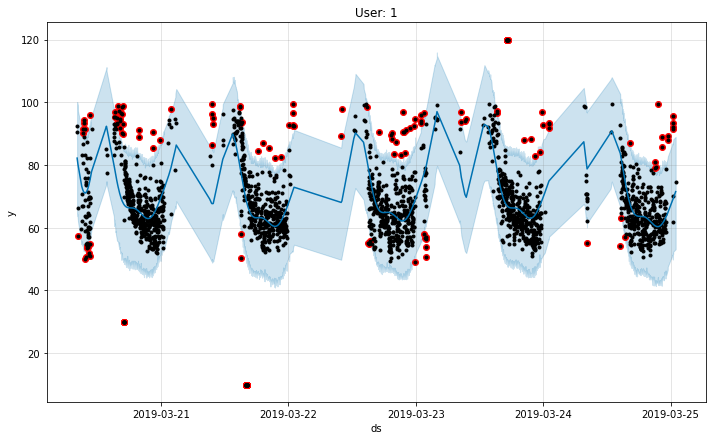

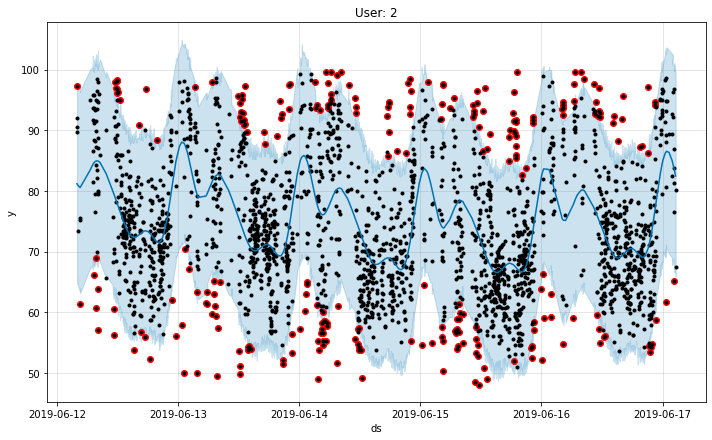

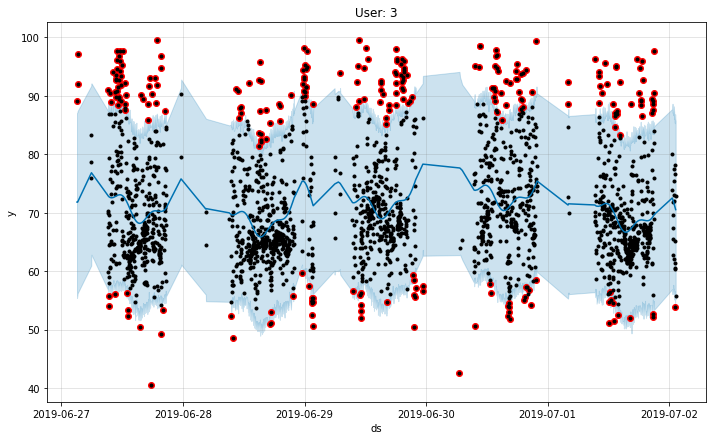

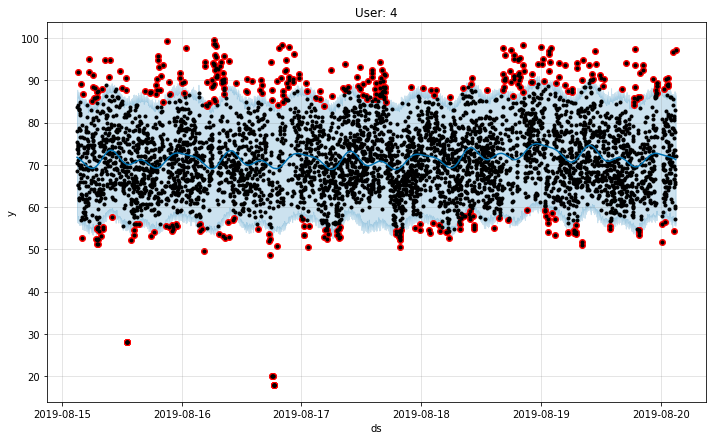

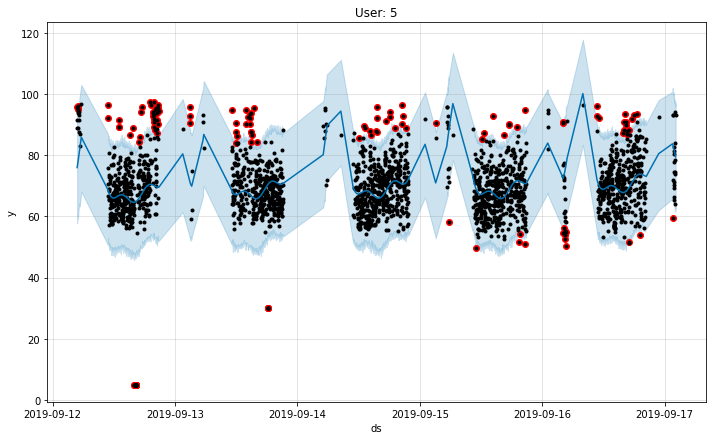

In [115]:
# Plot outlier models for heart rate
for user in df.user_id.unique():
    X_hr = df[(df.in_room == True) & (df.user_id == user) & (df.hr > min_hr)][['hr', 'ts']]
    X_hr.columns = ['y', 'ds']
    pr_hr = OutlierProphet(threshold=0.9,
                            yearly_seasonality=False, weekly_seasonality=False)
    pr_hr.fit(X_hr)
    plot_outliers(pr_hr, X_hr)

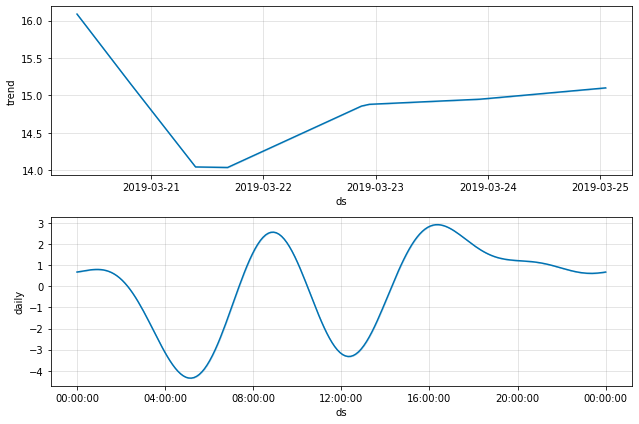

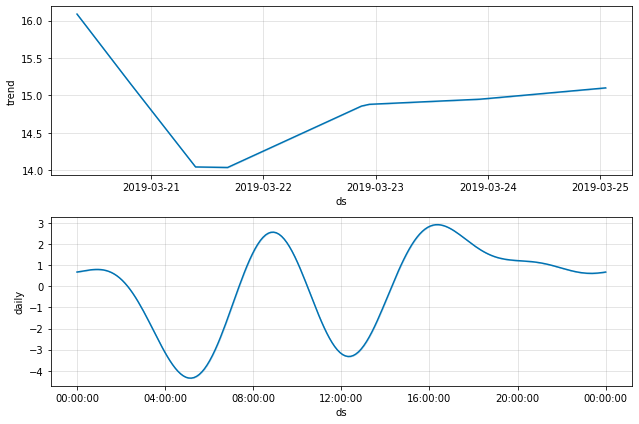

In [138]:
# Plot trend and daily seasonality for respitory rate and user 1
user = 1
X_rr = df[(df.in_room == True) & (df.user_id == user) & (df.rr > min_rr)][['rr', 'ts']]
X_rr.columns = ['y', 'ds']
pr_rr = Prophet(changepoint_range=0.9,
                    yearly_seasonality=False, weekly_seasonality=False)
pr_rr.fit(X_rr)

preds = pr_rr.predict(X_rr)
pr_rr.plot_components(preds)